In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Load the time series data from a CSV file
df = pd.read_csv('D:\Documents\TIme series data\data\poverty_ind.csv')

year = df['Year']
indicators = df.drop('Year', axis=1)

In [3]:
# Create a datetime index for the time series
datetime_index = pd.to_datetime(year, format='%Y')

# Get the input year from the user
input_year = int(input("Enter the year: "))

# Convert the input year to a number
input_year_num = float(input_year)

# Sort the DataFrame in ascending order by 'Year'
df_sorted = df.sort_values('Year')


In [4]:
# Create a synthetic DataFrame with missing years and arrange in ascending order
missing_years = np.arange(df_sorted['Year'].min(), df_sorted['Year'].max() + 1)
missing_years_df = pd.DataFrame({'Year': missing_years})
synthetic_data = pd.merge(df_sorted, missing_years_df, how='right').sort_values('Year')

In [5]:
# Iterate through the column and replace NaN values
for i in range(len(synthetic_data['Indicator'])):
    if pd.isna(synthetic_data['Indicator'].iloc[i]):
        if i > 0 and i < len(synthetic_data['Indicator']) - 1 and pd.notna(synthetic_data['Indicator'].iloc[i-1]) and pd.notna(synthetic_data['Indicator'].iloc[i+1]):
            synthetic_data['Indicator'].iloc[i] = (synthetic_data['Indicator'].iloc[i-1] + synthetic_data['Indicator'].iloc[i+1]) / 2
        else:
            synthetic_data['Indicator'].iloc[i] = synthetic_data['Indicator'].iloc[i-1]

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
df = synthetic_data

In [7]:

input_year = int(input("Enter the year: "))


In [8]:
# Split the DataFrame based on the input year
df_before = df[df['Year'] < input_year]
df_complete = df


In [9]:
# Create the time series model using data before the input year
model_before = sm.tsa.ARIMA(df_before['Indicator'], order=(1, 0, 0))
model_before_fit = model_before.fit()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

In [10]:
# Create the time series model using the complete dataset
model_complete = sm.tsa.ARIMA(df_complete['Indicator'], order=(1, 0, 0))
model_complete_fit = model_complete.fit()

In [11]:
next_five_before = model_before_fit.forecast(steps=5+(len(df_complete-df_before)))[0]
next_five_complete = model_complete_fit.forecast(steps=5)[0]

In [12]:
next_five_before = next_five_before[-5:]

In [13]:
Year = []

for i in range(1, 6):
    Year.append(i + df_sorted['Year'].max())


In [14]:
df_1 = pd.DataFrame()

In [15]:

df_1['Year'] = Year
df_1['next_five_before'] = next_five_before
df_1['next_five_complete'] = next_five_complete


In [16]:
df_1

,Year,next_five_before,next_five_complete
0,2021,52.15281,49.029422
1,2022,52.15281,49.047884
2,2023,52.15281,49.066235
3,2024,52.15281,49.084478
4,2025,52.15281,49.102613


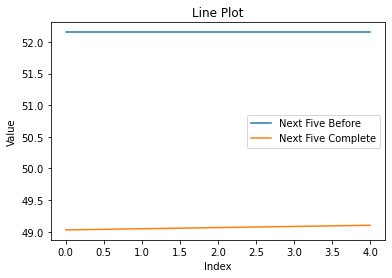

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Reset the index to use the default numeric index
df_1.reset_index(drop=True, inplace=True)

# Plot the 'next_five_before' column
plt.plot(df_1['Year'], df_1['next_five_before'], label='Next Five Before')

# Plot the 'next_five_complete' column
plt.plot(df_1['Year'], df_1['next_five_complete'], label='Next Five Complete')

# Set the title and labels for the plot
plt.title('Line Plot')
plt.xlabel('Index')
plt.ylabel('Value')

# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()
